# 서울시에서 일어나는 범죄와 체감 안전도
: 강남3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [192]:
import pandas as pd

In [193]:
crime_anal_police = pd.read_csv("../Data/crime_in_Seoul.csv", encoding='cp949')
crime_anal_police.head()


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [194]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [195]:
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [196]:
police_address = pd.read_csv("../Data/SeoulPoliceAddress.csv")
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [197]:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append("서울"+name[:-1]+"경찰서")

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [198]:
# 경찰서 갯수 확인
print(len(station_name))
print(len(police_address))

31
31


In [199]:
import urllib.request

client_id = "betup3nrn0"
client_secret = "I2aAkQI1ZMiUJaNl4dwHTYgUnMTbcSotqt87TFvh"

lat = []
lng = []

for n in range(len(police_address)):
    encText = urllib.parse.quote(police_address['주소'][n])
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:"+ rescode)

    import json
    data1 = json.loads(enText)
    lng.append(data1['addresses'][0]['x'])
    lat.append(data1['addresses'][0]['y'])
print(data1)

{'status': 'OK', 'meta': {'totalCount': 1, 'page': 1, 'count': 1}, 'addresses': [{'roadAddress': '서울특별시 강남구 개포로 617 서울수서경찰서', 'jibunAddress': '서울특별시 강남구 개포동 14 서울수서경찰서', 'englishAddress': '617, Gaepo-ro, Gangnam-gu, Seoul, Republic of Korea', 'addressElements': [{'types': ['SIDO'], 'longName': '서울특별시', 'shortName': '서울특별시', 'code': ''}, {'types': ['SIGUGUN'], 'longName': '강남구', 'shortName': '강남구', 'code': ''}, {'types': ['DONGMYUN'], 'longName': '개포동', 'shortName': '개포동', 'code': ''}, {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['ROAD_NAME'], 'longName': '개포로', 'shortName': '개포로', 'code': ''}, {'types': ['BUILDING_NUMBER'], 'longName': '617', 'shortName': '617', 'code': ''}, {'types': ['BUILDING_NAME'], 'longName': '서울수서경찰서', 'shortName': '서울수서경찰서', 'code': ''}, {'types': ['LAND_NUMBER'], 'longName': '14', 'shortName': '14', 'code': ''}, {'types': ['POSTAL_CODE'], 'longName': '06336', 'shortName': '06336', 'code': ''}], 'x': '127.0770985', 'y': '37.4934547

In [200]:
police_address['lng']=lng
police_address['lat']=lat

In [201]:
police_address.head()

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,126.9896139,37.5635144
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,126.9849292,37.5755322
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,126.9735627,37.5548186
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,126.9667851,37.5649018
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,126.9989318,37.5718764


In [202]:
police_address.to_csv("../Data/SeoulPoliceAddress_latlng.csv",index=False)

In [203]:
# 2개의 File에 경찰관서 동일한 이름인지 확인
len(station_name== police_address['경찰관서'])

31

> 두 컬럼이 내용과 순서가 동일하다.

In [204]:
# 경찰서의 주소중 구 이름만 추출하기
crime_anal_police['구별'] =[region.split()[1] for region in police_address['주소']][:len(police_address)]
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [205]:
# 주소중 2번째 단어의 끝에 '구' 이름만 출력하기
gu_name = []

for name in police_address['주소']:
    temp = name.split()
    temp_gu = [gu for gu in temp if gu[-1]=='구'][0]
    gu_name.append(temp_gu)

crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [206]:
len(gu_name)

31

In [207]:
# list의 중복값 확인
len(set(gu_name))

23

In [208]:
# 관서명과 구별 이름 확인
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [209]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재는 금천서는 금천구로 편성되어 있음
crime_anal_police.loc[crime_anal_police['관서명']=='금천서',['구별']]='금천구'

# DataSet을 보면 강서서가 양천구로 편성되어 있는데 현재는 강서서는 강서구로 편성되어 있음
crime_anal_police.loc[crime_anal_police['관서명']=='강서서',['구별']]='강서구'

In [210]:
crime_anal_police.loc[:,['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [211]:
# csv 저장
crime_anal_police.to_csv("../Data/Seoul_crime_include_gu_name.csv",index=False)

> 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야 한다.

In [212]:
len(crime_anal_police)

31

In [213]:
crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(",","").astype(int)
crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(",","").astype(int)
crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(",","").astype(int)
crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(",","").astype(int)

In [214]:
crime_anal_police.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [215]:
# 구별로 데이터를 정리한다.
crime_anal = pd.pivot_table(crime_anal_police,index=['구별'],aggfunc=sum)
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [216]:
# 각 범죄율 검거율 구하기
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100

In [217]:
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,100.000000,133.333333,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [218]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

In [219]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다.

In [220]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다.

# sol 1)
crime_anal[crime_anal.iloc[:,5:] >100] = 100

In [221]:
# sol 2)

# updateList = [['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']]
# for i in updateList:
#     crime_anal[crime_anal[i] > 100,[i]] = 100

In [222]:
# sol 3)

# crime_anal[crime_anal['강간검거율'] >100, ['강간검거율']] = 100
# crime_anal[crime_anal['강도검거율'] >100, ['강도검거율']] = 100
# crime_anal[crime_anal['살인검거율'] >100, ['살인검거율']] = 100
# crime_anal[crime_anal['절도검거율'] >100, ['절도검거율']] = 100
# crime_anal[crime_anal['폭력검거율'] >100, ['폭력검거율']] = 100

In [223]:
crime_anal.rename(columns={
    '강간 발생':'강간',
    '강도 발생':'강도',
    '살인 발생':'살인',
    '절도 발생':'절도',
    '폭력 발생':'폭력'
    },inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


---
# 데이터의 정규화(Normalization)
- 강도와 살인은 2자릿수이나 절도와 폭력은 4자리입니다.
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리합니다.
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋습니다.

In [224]:
# 머신러닝 모듈 사용하기
# sklearn의 preprocessing기능을 사용하면 최대값과 최솟값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [225]:
# 정규화를 진행할 컬럼 설정
col = ['강간','강도','살인','절도','폭력']

In [226]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [227]:
# 최대값과 최소값의 값 가져오기
min_max_scalar = preprocessing.MinMaxScaler()
min_max_scalar

MinMaxScaler()

In [228]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float 설정
x_scaled = min_max_scalar.fit_transform(x.astype(float)) # 학습시키는 것을 fit
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [229]:
# 정규화된 범죄건수가 있는 새로운 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [230]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
### CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [231]:
result_CCTV = pd.read_csv("../Data/CCTV_Result.csv",index_col='구별')
result_CCTV.head()

,Unnamed: 0,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,0,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,2,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,3,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,4,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [232]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [233]:
import numpy as np

In [234]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [235]:
# 검거율도 통합하여 컬럼 생성
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


---
# Seaborn을 활용한 시각화

In [236]:
import seaborn as sns

In [237]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

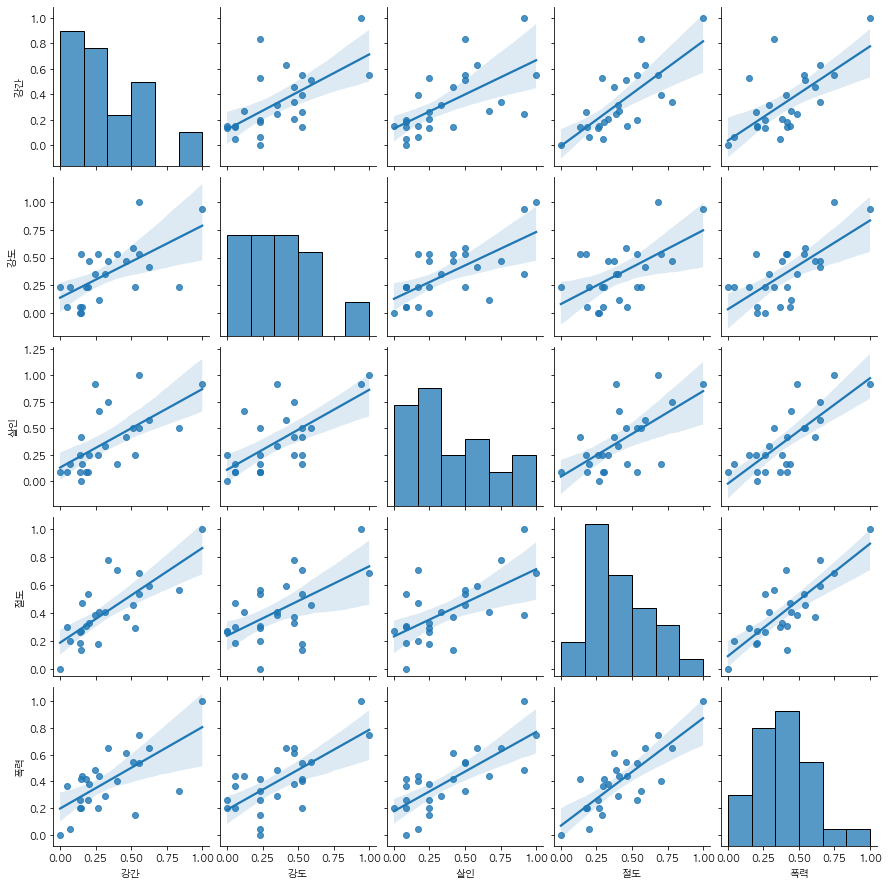

In [238]:
# 강간, 강도, 살인, 폭력, 절도 건수에 대한 상관관계 시각화

sns.pairplot(
    crime_anal_norm,
    vars= ['강간','강도','살인','절도','폭력'],
    kind='reg'
)
plt.show()

> 5대범죄 모두 양의 상관관계     
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다. 

### CCTV와 살인, 강도에 대한 그래프 

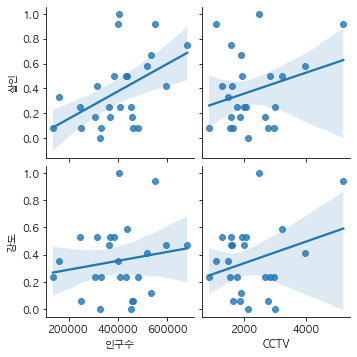

In [239]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인','강도'],
    kind="reg"
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생수도 증가한다.    
> 특히, 강도보다는 살인 발생수가 훨씬 많이 증가한다.    
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다.

### 인구수, CCTV와 살인 검거율, 폭력검거율을 회귀선으로 확인후 Comment

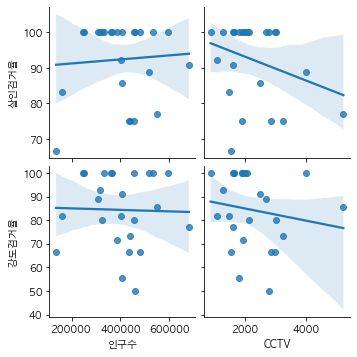

In [240]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인검거율','강도검거율'],
    kind="reg"
)
plt.show()

> 인구수는 살인검거율에 대해선 약간 증가하나 강도검거율과는 연관관계가 없다.    
> CCTV는 살인검거율, 강도검거율과 반비례 관계이다. 

> 인구수가 증가하면 폭력검거율이 감소하는 역상관을 보인다.         
> 인구수와 살인검거율간 상관관계는 매우 약해 보인다.     
> CCTV와 살인, 폭력 검거율간 관계는 역상관관계를 보인다. 즉, CCTV가 증가할수록 폭력, 살인 검거율이 감소하는 경향이 있다.        
> 특히, 살인검거율에 있어서는 강한 역상관을 보인다.

> CCTV 대수가 낮은 곳은 애초에 살인 발생수가 많기 때문에 몇 개 검거를 못한다 하더라도 검거율이 확떨어지지 않는다.      
> 많은 곳은 발생수가 적으니까 몇 개 검거를 못하면 검거율이 떨어진다. 


---
## heatmap을 이용한 전체 검거율 확인 

In [241]:
# 검거 최대값 가져오기 
tmp_max = crime_anal_norm['검거'].max()

# 검거의 최대값을 100으로 설정하고 검거율 계산하기 
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100 

# 검거율을 기준으로 정렬하기 
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


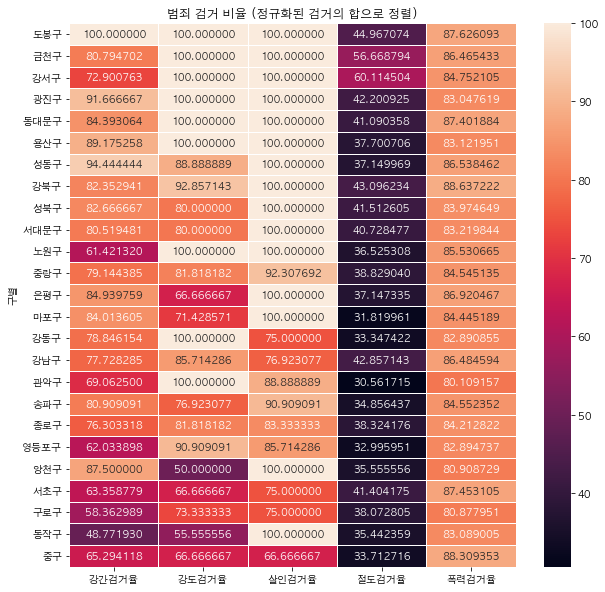

In [242]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True,
    fmt = 'f', # float으로 수치 표시, 안쓰면 지수로 나옴 
    linewidths=0.5
)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

> 절도검거율이 다른 범죄의 검거율에 비해 매우 저조하다     
> (절도, 폭력은 색이 비슷하니 제외하고 나머지 3개 범죄에 대해) 검거율이 우수한 지역은 도봉, 광진, 성동, 용산이다       

### heatmap을 이용한 범죄 발생률 확인 

In [243]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,3.686223


In [244]:
# 범죄의 최대값을 100으로 설정하고 검거율 계산하기 
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 100 


In [245]:
# 범죄율을 기준으로 정렬하기 
crime_anal_norm_sort_crime = crime_anal_norm.sort_values(by='범죄', ascending=False)
crime_anal_norm_sort_crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.048578,3.697074
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,404766,2495,0.039837,3.545480
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.909091,76.923077,90.909091,34.856437,84.552352,680883,1586,0.029878,3.681500
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.028603,3.686223
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,386086,1935,0.026529,3.717073


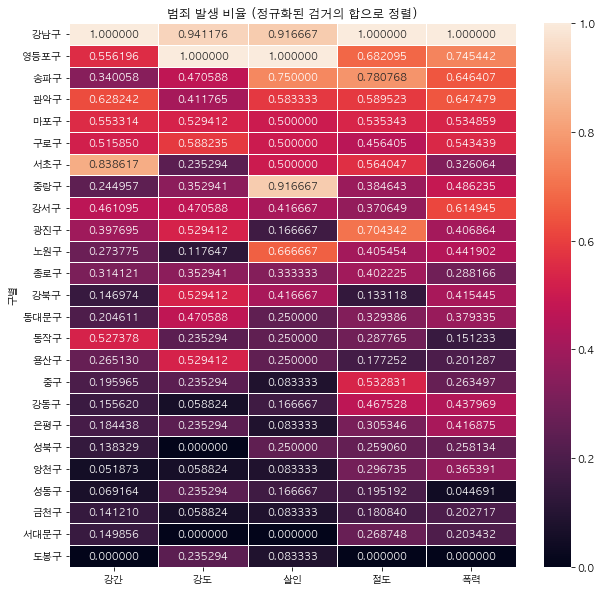

In [246]:
# 범죄율 높은 순으로 지역 정렬해서 각 범죄에 대한 발생(정규화된 검거합)을 히트맵으로 표현 
target_col = ['강간','강도','살인','절도','폭력']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort_crime[target_col],
    annot=True,
    fmt = 'f', # float으로 수치 표시, 안쓰면 지수로 나옴 
    linewidths=0.5
)
plt.title('범죄 발생 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [248]:
# 저장하기
crime_anal_norm.to_csv("../Data/seoul_crime_norm.csv")

# 지도출력 

In [249]:
import json
import folium

In [250]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 살인 건수를 서울시 지도에 출력

In [254]:
map = folium.Map(
    location=[37.5502,126.982],
    zoom_start = 10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data = crime_anal_norm,
    columns=[crime_anal_norm.index,'살인'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
map

In [255]:
# 인구대비 범죄율 지도 출력
# 범죄 / 인구수 * 100000 , 10만명당 범죄발생비율
map = folium.Map(
    location=[37.5502,126.982],
    zoom_start = 10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data = crime_anal_norm['범죄']/crime_anal_norm['인구수'] * 100000,
    columns=crime_anal_norm.index,
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
map